In [126]:
import pandas as pd
import numpy as np  
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

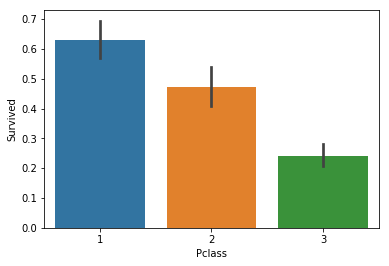

In [176]:
import seaborn as sb
sb.barplot(x='Pclass', y='Survived', data=train)

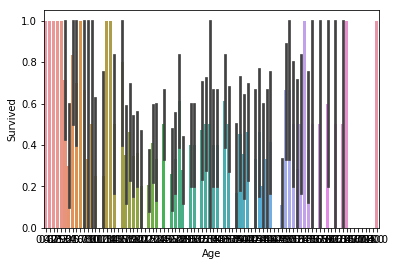

In [178]:
sb.barplot(x='Age', y='Survived', data=train)

In [93]:
sex=[]
for i in train['Sex']:
    if i=='male':
        sex.append(0)
    else:
        sex.append(1)
train['sex']=sex
train=train.drop(['Sex'],1)

In [94]:
train['Age']=train['Age'].fillna(28)
train['Cabin']=train['Cabin'].fillna('G6')
train['Fare']=train['Fare'].round(0)

In [95]:
age=[]
for i in train['Age']:
    if i<30:
        age.append(1)
    elif 30<i<50:
        age.append(2)
    else:
        age.append(3)
train['age']=age
train=train.drop(['Age'],1)

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,age
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.0,G6,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.0,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,8.0,G6,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.0,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0,G6,S,0,2


In [97]:
train=train.drop(['Name','Ticket','Cabin','Embarked'],1)

In [98]:
out=train['Survived']
inp=train.drop(['Survived'],1)
inp['Fare']=inp['Fare'].round(0)

In [99]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
reg_mod=LogisticRegression()
reg_mod.fit(xtrain,ytrain)

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
ypred=reg_mod.predict(xtest)

In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.7985074626865671
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       167
           1       0.73      0.74      0.74       101

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

[[139  28]
 [ 26  75]]


# Predicting the Model

In [127]:
sex=[]
for i in test['Sex']:
    if i=='male':
        sex.append(0)
    else:
        sex.append(1)
test['sex']=sex
test=test.drop(['Sex'],1)

In [128]:
test['Fare']=test['Fare'].fillna(35)

In [129]:
test['Age']=test['Age'].fillna(28)
test['Cabin']=test['Cabin'].fillna('G6')
test['Fare']=test['Fare'].round(0)

In [130]:
age=[]
for i in test['Age']:
    if i<30:
        age.append(1)
    elif 30<i<50:
        age.append(2)
    else:
        age.append(3)
test['age']=age
test=test.drop(['Age'],1)

In [131]:
test.head()

,PassengerId,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,age
0,892,3,"Kelly, Mr. James",0,0,330911,8.0,G6,Q,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0,G6,S,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,0,240276,10.0,G6,Q,0,3
3,895,3,"Wirz, Mr. Albert",0,0,315154,9.0,G6,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.0,G6,S,1,1


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
sex            418 non-null int64
age            418 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 36.0+ KB


In [133]:
inp=test.drop(['Name','Ticket','Cabin','Embarked'],1)

In [134]:
test1=pd.get_dummies(inp,drop_first=True)

In [139]:
ypred1= reg_mod.predict(test1)
final=pd.DataFrame()
final['PassengerId']=test['PassengerId']
final['Survived']=ypred1

In [140]:
final.to_csv("output.csv")

In [141]:
final.shape

(418, 2)